# EM algorithm for Quantile Regression

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv("E:/20211/ĐATN/Models/Data/DATN/engel-data.txt", sep=" ")

In [3]:
df

,Unnamed: 0,Household_income,Food_expenditure
0,NaN,420.157651,255.839425
1,NaN,541.411707,310.958667
2,NaN,901.157457,485.680014
3,NaN,639.080229,402.997356
4,NaN,750.875606,495.560775
...,...,...,...
230,NaN,440.517424,306.519079
231,NaN,541.200597,299.199328
232,NaN,581.359892,468.000798
233,NaN,743.077243,522.601906


Text(0, 0.5, 'Food expenditure')

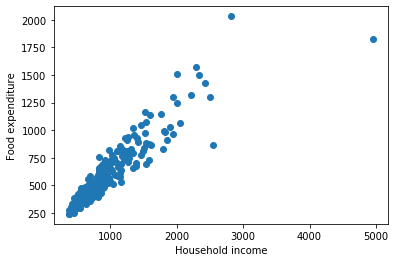

In [4]:
plt.scatter(df["Household_income"], df["Food_expenditure"])
plt.xlabel("Household income")
plt.ylabel("Food expenditure")

### Add Column of $x_{0} = 1$

In [5]:
n = len(df)

In [6]:
one_array = np.ones([n,1])

In [7]:
df['x0'] = one_array

In [8]:
df

,Unnamed: 0,Household_income,Food_expenditure,x0
0,NaN,420.157651,255.839425,1.0
1,NaN,541.411707,310.958667,1.0
2,NaN,901.157457,485.680014,1.0
3,NaN,639.080229,402.997356,1.0
4,NaN,750.875606,495.560775,1.0
...,...,...,...,...
230,NaN,440.517424,306.519079,1.0
231,NaN,541.200597,299.199328,1.0
232,NaN,581.359892,468.000798,1.0
233,NaN,743.077243,522.601906,1.0


In [9]:
X = np.array([df['x0'], df['Household_income']])

In [10]:
Y = np.array(df['Food_expenditure']).reshape(n,1)

## EM algorithm

### Initialize $\beta_{p}^{(0)}$

In [11]:
beta_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(X, X.transpose())),X),Y)

Text(0, 0.5, 'Food expenditure')

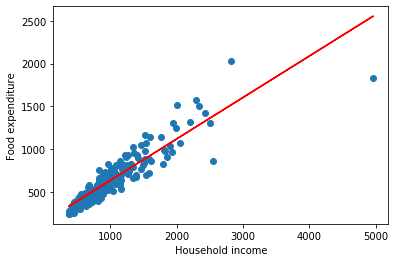

In [12]:
plt.figure()
plt.scatter(df["Household_income"], df["Food_expenditure"])
plt.plot(df["Household_income"], [beta_OLS[0]+x*beta_OLS[1] for x in df["Household_income"]], color='red', label="Lin Reg")
plt.xlabel("Household income")
plt.ylabel("Food expenditure")

In [13]:
beta_OLS

array([[147.47538852],
       [  0.48517842]])

### Update Formula

In [14]:
num_iter = 50
# p = 0.25

In [15]:
def QR(X, Y, p):
    # Initialization
    beta_before = np.matmul(np.matmul(np.linalg.inv(np.matmul(X, X.transpose())),X),Y)
    beta_loop = beta_before
    # Parameter
    theta = (1-2*p)*1. / (p*(1-p))
    tau2 = 2./(p*(1-p))
    # Function
    for i in range(num_iter):
        # Creating matrix W
        W = np.zeros([n,n])
        for j in range(n):
            W[j,j] = (np.sqrt(theta**2 + 2*tau2)) / (np.abs(Y[j] - np.matmul(X[:,j],beta_loop)))
        beta = np.matmul(np.linalg.inv(np.matmul(np.matmul(X, W),X.transpose())), np.matmul(np.matmul(X,W),Y)-theta*np.matmul(X,one_array))
        beta_loop = beta
    return beta

In [16]:
# Try out
QR(X, Y, 0.25)

array([[95.48352598],
       [ 0.47410321]])

## Running Result

In [17]:
# Result for 0.1, 0.2, ..., 0.9 quantiles.
param = {}
num = 10
for i in range(1,num):
    param[1./num*i] = QR(X, Y, 1./num*i)

In [18]:
param

{0.1: array([[110.1422608],
        [  0.4017648]]), 0.2: array([[102.74214179],
        [  0.44667854]]), 0.30000000000000004: array([[98.99998292],
        [ 0.48146739]]), 0.4: array([[101.9598824 ],
        [  0.50989646]]), 0.5: array([[82.66034321],
        [ 0.55886345]]), 0.6000000000000001: array([[79.70470481],
        [ 0.58584798]]), 0.7000000000000001: array([[79.28358885],
        [ 0.60885104]]), 0.8: array([[56.03327212],
        [ 0.66037117]]), 0.9: array([[64.84019279],
        [ 0.6878257 ]])}

## Plot Data with QR Line 

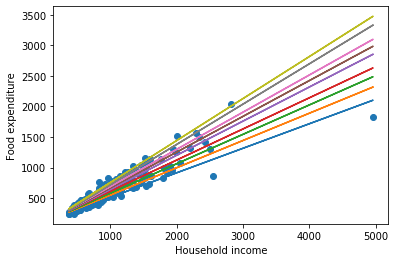

In [20]:
plt.figure()
plt.scatter(df["Household_income"], df["Food_expenditure"])
plt.xlabel("Household income")
plt.ylabel("Food expenditure")
#plt.plot(df["Household_income"], [beta_OLS[0]+x*beta_OLS[1] for x in df["Household_income"]])
num = 10
for i in range(1,num):
    beta_quantile = param[1./num*i]
    plt.plot(df["Household_income"], [beta_quantile[0]+x*beta_quantile[1] for x in df["Household_income"]])